# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API (note- in production avoid setting verify to False)
url = 'http://api.forismatic.com/api/1.0/'
params = {
    'method': 'getQuote',
    'format': 'json',
    'lang': 'en',  # Change this to get quotes in a different language
}
response = requests.get(url, params=params)

# print(response.json(), "\n")

if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))

    # Extract relevant object and field
    quote = data['quoteText']
    author = data['quoteAuthor']

    print(f'"{quote}" - {author}')
else:
    print("Failed to fetch data.")

{
    "quoteText": "The day is already blessed, find peace within it.",
    "quoteAuthor": "",
    "senderName": "",
    "senderLink": "",
    "quoteLink": "http://forismatic.com/en/e10add01cb/"
}
"The day is already blessed, find peace within it." - 


## Cleaning

In [4]:
import requests

# Fetch a web page
r = requests.get("https://news.ycombinator.com")
print(r.text)

<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?xWJHHJhmK7T6OwsLQylz">
        <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.svg" width="18" height="18" style="border:1px white solid; display:block"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
                            <a href="newest">new</a> | <a href

In [7]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


        
          
        Hacker News
        
                  Hacker News
                            new | past | comments | ask | show | jobs | submit            
                              login
                          
              

            
      1.      Dieselgate, but for trains – some heavyweight hardware hacking (badcyber.com)
          101 points by GruHe 1 hour ago  | hide | 21&nbsp;comments        
              
      
                
      2.      Problems on the Galaxy Store (samsung.com)
          23 points by SSNLF 43 minutes ago  | hide | 7&nbsp;comments        
              
      
                
      3.      Kagi Search – Paywalled articles indicator and improved weather widget (kagi.com)
          296 points by mroche 7 hours ago  | hide | 145&nbsp;comments        
              
      
                
      4.      No distributed quantum advantage for approximate graph coloring (arxiv.org)
          9 points by nabla9 27 minutes ago  | hide 

In [8]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.prettify())

<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?xWJHHJhmK7T6OwsLQylz" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tbody>
     <tr>
      <td bgcolor="#ff6600">
       <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
        <tbody>
         <tr>
          <td style="width:18px;padding-right:4px">
           <a href="https://news.ycombinator.com">
            <img height="18" src="y18.svg" style="border:1px white solid; display:block" width="18"/>
           </a>
          </td>
          <td style="line-height:12pt; height:10px;">
           <span cla

In [9]:
# Find all articles
summaries = soup.find_all("tr", class_="athing")
summaries[0]

<tr class="athing" id="38567687">
      <td align="right" class="title" valign="top"><span class="rank">1.</span></td>      <td class="votelinks" valign="top"><center><a href="vote?id=38567687&amp;how=up&amp;goto=news" id="up_38567687"><div class="votearrow" title="upvote"></div></a></center></td><td class="title"><span class="titleline"><a href="https://badcyber.com/dieselgate-but-for-trains-some-heavyweight-hardware-hacking/" rel="noreferrer">Dieselgate, but for trains – some heavyweight hardware hacking</a><span class="sitebit comhead"> (<a href="from?site=badcyber.com"><span class="sitestr">badcyber.com</span></a>)</span></span></td></tr>

In [10]:
# Extract title
summaries[0].find("span", class_="titleline").get_text()

'Dieselgate, but for trains – some heavyweight hardware hacking (badcyber.com)'

In [11]:
# Find all articles, extract titles
articles = []
summaries = soup.find_all("tr", class_="athing")
for summary in summaries:
    title = summary.find("span", class_="titleline").get_text()
    articles.append((title))

print(len(articles), "Article summaries found. Sample:")
print(articles[0])

30 Article summaries found. Sample:
Dieselgate, but for trains – some heavyweight hardware hacking (badcyber.com)


## Normalization

### Case Normalization

In [12]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [13]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [14]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [15]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [16]:
import os
import nltk
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))

In [17]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [18]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [19]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [20]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [22]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part of Speech Tagging/ Sentence Parsing

In [23]:
from nltk import pos_tag
from IPython.display import display

Tree with NER

[('Dr.', 'NNP'), ('Smith', 'NNP'), ('graduated', 'VBD'), ('from', 'IN'), ('the', 'DT'), ('University', 'NNP'), ('of', 'IN'), ('Washington', 'NNP'), ('.', '.')]


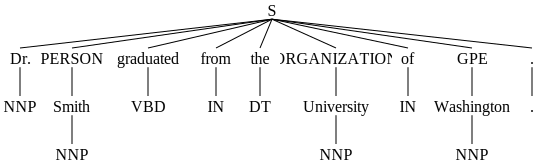

[('He', 'PRP'), ('later', 'RB'), ('started', 'VBD'), ('an', 'DT'), ('analytics', 'NNS'), ('firm', 'NN'), ('called', 'VBD'), ('Lux', 'NNP'), (',', ','), ('which', 'WDT'), ('catered', 'VBD'), ('to', 'TO'), ('enterprise', 'VB'), ('customers', 'NNS'), ('.', '.')]


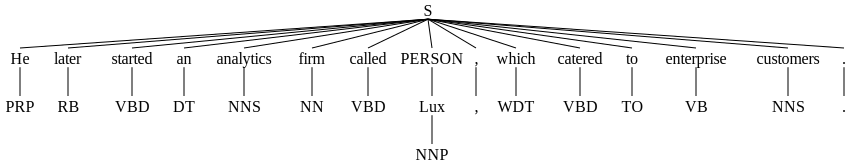

In [25]:
for sentence in sentences:
    tags = pos_tag(word_tokenize(sentence))
    print(tags)
    tree = nltk.chunk.ne_chunk(tags)
    display(tree)

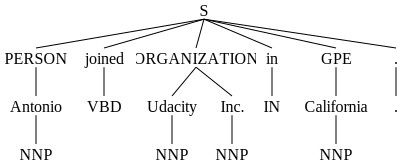

In [26]:
nltk.chunk.ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))

Custom parser

In [27]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


## Stemming & Lemmatization

### Stemming

In [28]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [29]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [30]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
